In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [90]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [91]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [92]:
#checking for dupicates
print(df.duplicated().sum())

0


In [93]:
# Drop useless or constant columns
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [94]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [95]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [96]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [97]:
#encoding categorial variables
categorical = ['BusinessTravel', 'Department', 'EducationField', 
               'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [98]:
df = pd.get_dummies(df, columns=categorical, drop_first=True)


In [123]:
#scaling numerical columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Exclude target column 'Attrition'
numeric_features = df.drop('Attrition', axis=1).columns
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [124]:
#spliting data for training the model
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [125]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8605442176870748
[[237  10]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [105]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Res

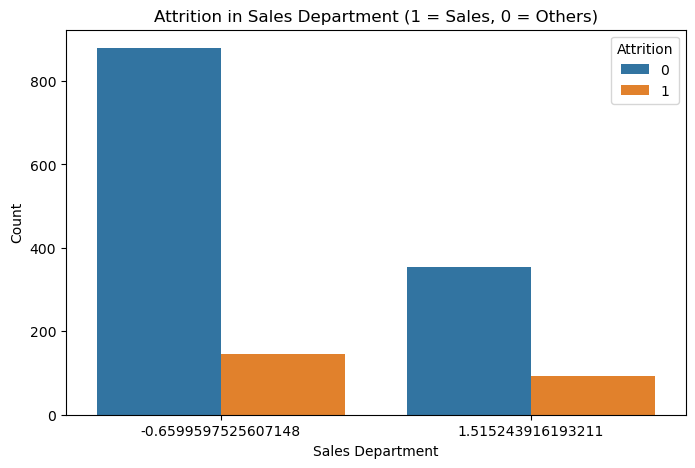

In [106]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department_Sales', hue='Attrition', data=df)
plt.title("Attrition in Sales Department (1 = Sales, 0 = Others)")
plt.xlabel("Sales Department")
plt.ylabel("Count")
plt.show()

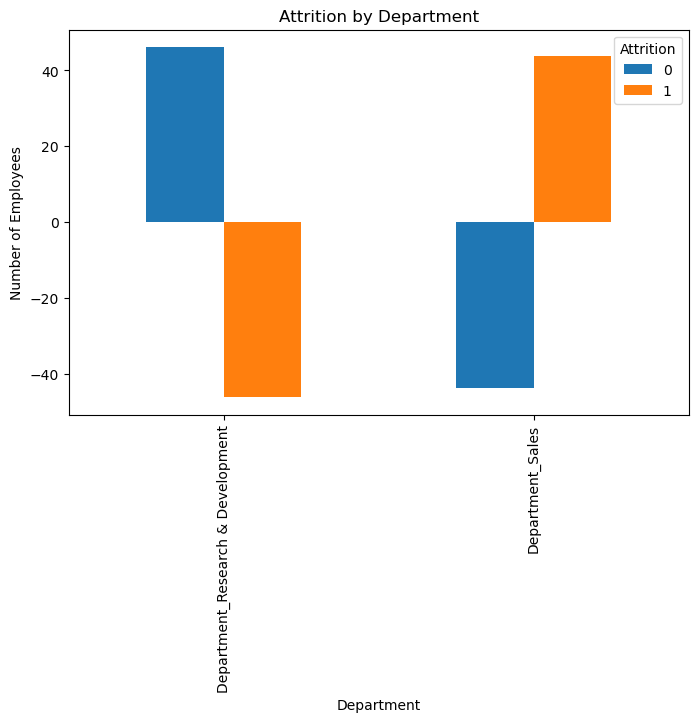

In [107]:
dept_cols = ['Department_Research & Development', 'Department_Sales']
dept_attrition = df.groupby('Attrition')[dept_cols].sum()
dept_attrition.T.plot(kind='bar', figsize=(8,5))
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()


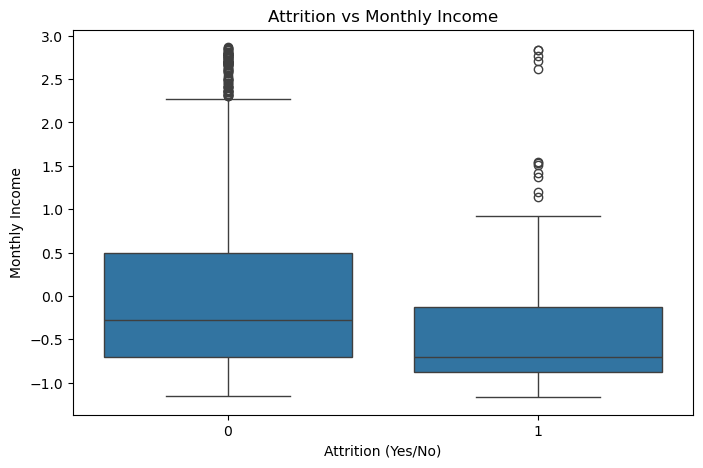

In [110]:
#monthly wise income
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Monthly Income")
plt.show()

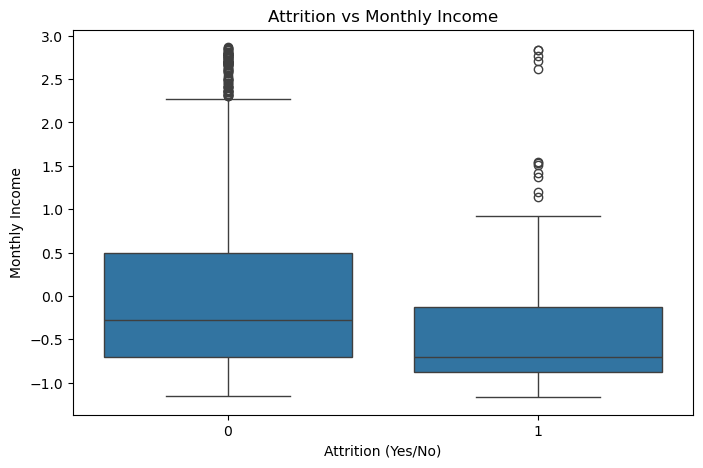

In [111]:
#attrition vs years at company
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Monthly Income")
plt.show()

Attrition          0          1
Gender                         
Female     83.877551  16.122449


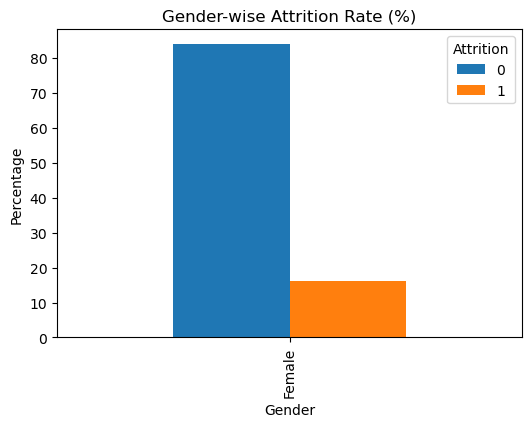

In [113]:
#attrition rate wrt gender
gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack() * 100
print(gender_attrition)
gender_attrition.plot(kind='bar', figsize=(6,4))
plt.title("Gender-wise Attrition Rate (%)")
plt.ylabel("Percentage")
plt.show()


In [117]:
df = pd.get_dummies(df, drop_first=True)

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'YearsAtCompany']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [119]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,1,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,0,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,0,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,0,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241


In [121]:
# Import necessary library
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Attrition', axis=1)  
y = df['Attrition']               

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [122]:
#training models
#a) logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       255
           1       0.56      0.46      0.51        39

    accuracy                           0.88       294
   macro avg       0.74      0.70      0.72       294
weighted avg       0.87      0.88      0.88       294



In [126]:
#b) decision tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7619047619047619


In [129]:
#c)RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))



Random Forest Accuracy: 0.8333333333333334


In [130]:
#d)support vector machine
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8673469387755102


In [132]:
#comparing the model performance
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm)
]

import pandas as pd
results = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(results)


                 Model  Accuracy
0  Logistic Regression  0.744898
1        Decision Tree  0.761905
2        Random Forest  0.833333
3                  SVM  0.867347


C:\Users\Chitra\AppData\Local\Temp\ipykernel_8000\1351992800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='coolwarm')


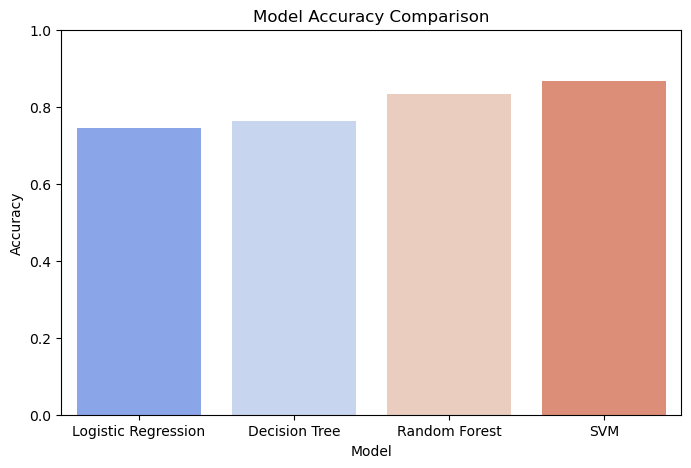

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='coolwarm')
plt.title('Model Accuracy Comparison')
plt.ylim(0,1)
plt.show()


                 Feature  Importance
9          MonthlyIncome    0.072306
0                    Age    0.072260
16     TotalWorkingYears    0.053589
1              DailyRate    0.051670
5             HourlyRate    0.047866
2       DistanceFromHome    0.047793
10           MonthlyRate    0.047228
19        YearsAtCompany    0.044137
43          OverTime_Yes    0.037830
22  YearsWithCurrManager    0.035452


C:\Users\Chitra\AppData\Local\Temp\ipykernel_8000\3522732706.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')


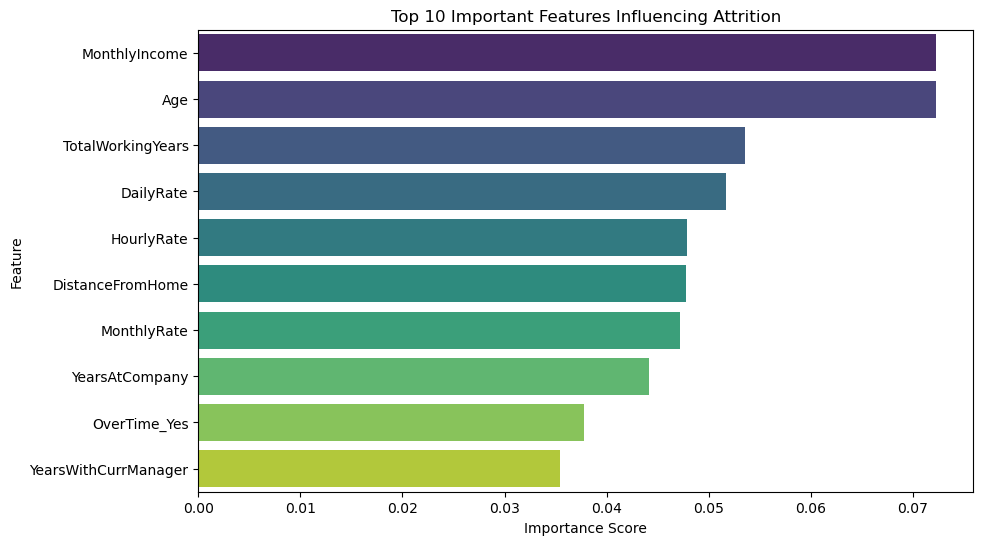

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame to display them nicely
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Show top 10 features
print(feature_importance.head(10))

# Plot the top 10 important features
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), palette='viridis')
plt.title('Top 10 Important Features Influencing Attrition')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [135]:
#evaluation of model
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns


In [138]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print("Accuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1-score :", f1)
print("\nDetailed classification report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.8333333333333334
Precision: 0.4166666666666667
Recall   : 0.10638297872340426
F1-score : 0.1694915254237288

Detailed classification report:

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       247
           1       0.42      0.11      0.17        47

    accuracy                           0.83       294
   macro avg       0.63      0.54      0.54       294
weighted avg       0.78      0.83      0.79       294



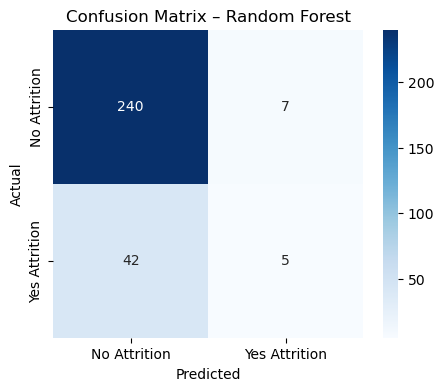

In [139]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition','Yes Attrition'],
            yticklabels=['No Attrition','Yes Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – Random Forest')
plt.show()


In [141]:
print("NaN in y_test:", y_test.isna().sum())
print("NaN in y_pred_proba:", np.isnan(y_pred_proba).sum())


NaN in y_test: 0
NaN in y_pred_proba: 0


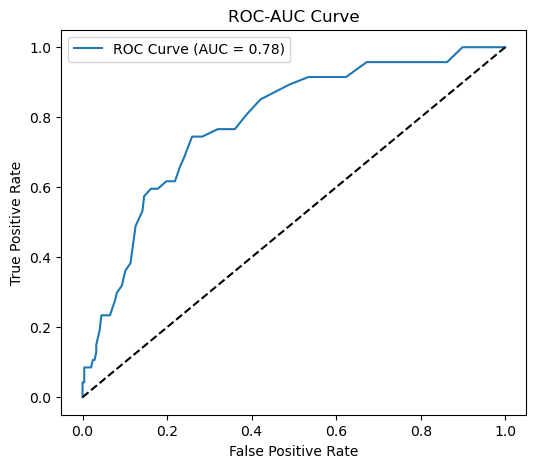

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
df.to_csv("employee_attrition_results.csv", index=False)